### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

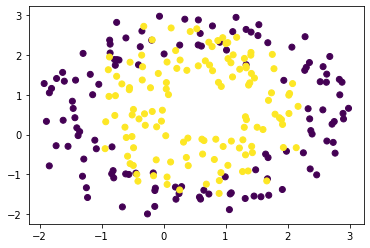

In [11]:
# Load dataset
X = pd.read_csv('q3_data.csv').iloc[:,0:2].values
Y = pd.read_csv('q3_data.csv',).iloc[:,2].values

# Plot points
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [12]:
# Transform points to 28D space
def feature(x1,x2):
    
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    x = np.zeros((x1.shape[0],28))
    # ones = np.ones(X[:,0].shape).reshape(-1,1)
    c = 0
    for i in range(7):
        for j in range(i+1):
            x[:,c] = (x1**[i-j] * x2**[j]).reshape(-1,)
            c += 1
    return x

x = feature(X[:,0],X[:,1])

## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

Final Trained weights are:  [[ 0.37499233  0.12495533  0.11033168  0.13519813 -0.01810228  0.10696785
   0.22750716  0.09020575  0.07591909  0.08421706  0.08878765  0.06146494
   0.02697713  0.03597029 -0.11312504  0.29831899  0.08117889  0.06715878
   0.05294107  0.07583649  0.08796567 -0.18954251 -0.00209493 -0.15977879
   0.0357541  -0.10583362 -0.02857339 -0.02563658]]


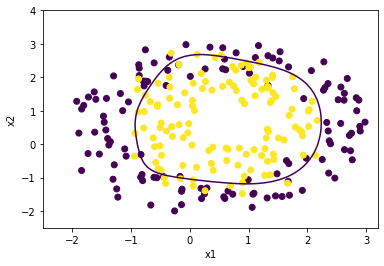

In [13]:
# Define your functions here
def sigmoid(z):
    g = 1/(1+(np.exp(-z)))
    return g

def calculate_gradients(N,h,Y,x,theta,lam):
    #np.comcatenate(0,theta[0,1:],axis=1)
    a = [0]
    a = np.append(a,theta[0,1:])
    grad = np.sum(np.multiply(h-Y,x),axis=0)/(N) + (lam*a/N)
    return grad

def update_weights(prev_weights, grad, learning_rate):
    theta = np.zeros((1,28))
    theta = prev_weights-(learning_rate*grad)
    return theta

def logistic_regression_regularized(x, Y, theta, lam, learning_rate = 0.0001, num_steps = 50000):
    N = len(Y)
    Y = Y.reshape(-1,1)
    
    for i in range(num_steps):
        h = sigmoid(np.matmul(x,theta.T))
        grad = calculate_gradients(N,h,Y,x,theta,lam)
        theta = update_weights(theta, grad, learning_rate)
    return theta

theta = np.zeros((1,28))
lam = 1
Trainedtheta = logistic_regression_regularized(x, Y, theta, lam)

print("Final Trained weights are: ", Trainedtheta)
# Plot decision boundary

def predict(x,Trainedtheta):
    return sigmoid(np.matmul(x,Trainedtheta.T))

def plot():
    x1 = np.linspace(-2.5, 3.2, 100)
    x2 = np.linspace(-2.5, 4.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    
    y_pred = np.zeros(X1.shape)
    ctr = 0
    for i in range(len(X1)):
        for j in range(len(X2)):
            xx = feature(X1[i,j],X2[i,j])              
            y_pred[i,j] = predict(xx,Trainedtheta)        
            
    plt.contour(X1, X2, y_pred,[0.5])
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot()

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


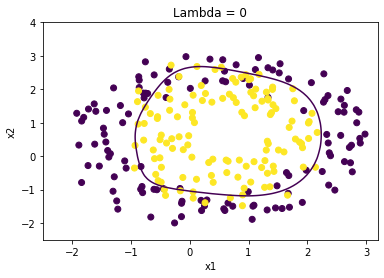

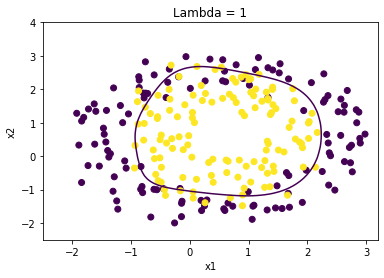

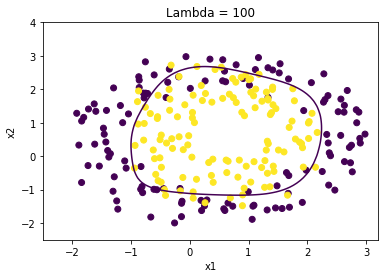

In [14]:
# lambda = 0
lam = 0
Trainedtheta = logistic_regression_regularized(x, Y, theta, lam)
plt.title("Lambda = 0")
plot()
# lambda = 1
lam = 1
Trainedtheta = logistic_regression_regularized(x, Y, theta, lam)
plt.title("Lambda = 1")
plot()
# lambda = 100
lam = 100
Trainedtheta = logistic_regression_regularized(x, Y, theta, lam)
plt.title("Lambda = 100")
plot()

Answer for part (d) here: 

There is no major difference between the decision boundary for lambda equal to 0 and 1. When the lambda is increased significantly, i.e., lambda = 100, the decision boundary inflates slightly at the left-bottom corner of the contour. Rest of the part remains the same as the other cases of lambda. 

As the value of the hyper-parameter decreases, the curve fits better to the data points. It moves from the underfit domain to properly fitting the curve without generating bias. Reducing the value of the lamba results in an increase in the number of non-zero features, which result in a good-fitted model. It can be clearly seen in case of lambda = 100, the decision boundary starts to include data points that are in the other class.
